In [6]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [7]:
from models.neural_network import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [8]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [9]:
X_train  = X_train / 255.0
X_test = X_test / 255

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(-1 , 28 * 28)
X_test = X_test.reshape(-1 , 28 * 28)

In [12]:
X_train.shape

(60000, 784)

In [13]:
model = NeuralNetwork()

In [14]:
y_train_enc = np.zeros((y_train.shape[0], 10))
y_train_enc[np.arange(y_train.shape[0]), y_train] = 1

y_train_enc.shape

(60000, 10)

In [15]:
model.train(X_train, y_train_enc, epochs=1000, lr=0.03)

Epoch 0: Loss = 2.3704
Epoch 100: Loss = 0.7724
Epoch 200: Loss = 0.4872
Epoch 300: Loss = 0.3987
Epoch 400: Loss = 0.3546
Epoch 500: Loss = 0.3266
Epoch 600: Loss = 0.3061
Epoch 700: Loss = 0.2899
Epoch 800: Loss = 0.2764
Epoch 900: Loss = 0.2649


In [16]:
X_test.shape

(10000, 784)

In [17]:
y_test_enc = np.zeros((y_test.shape[0], 10))
y_test_enc[np.arange(y_test.shape[0]), y_test] = 1

y_test_enc.shape

(10000, 10)

In [18]:
y_pred = model.predict(X_train)

In [19]:
y_train_enc[:4] , y_pred[0:4]

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([5, 0, 4, 1], dtype=int64))

In [20]:
y_test_pred = model.predict(X_test)

In [21]:
y_test_enc[:4] , y_test_pred[:4]

(array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([7, 2, 1, 0], dtype=int64))

In [22]:
accuracy = model.accuracy(X_test, y_test_enc)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.83%


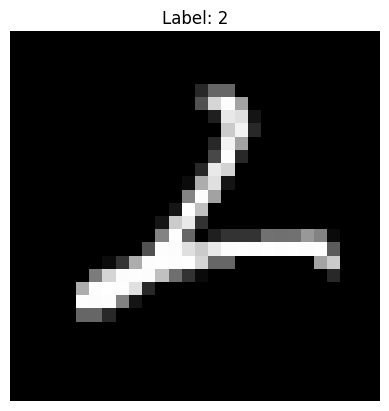

Predicted Digit: 2


In [23]:
index = 43

plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title("Label: " + str(y_test[index]))
plt.axis('off')
plt.show()

pred = model.predict(X_test[index].reshape(1, -1))
print("Predicted Digit:", pred[0])
